This notebook uses the [Copernicus Marine Toolbox](https://help.marine.copernicus.eu/en/articles/7970514-copernicus-marine-toolbox-installation) to download a subset of Copernicus's [Altimeter satellite gridded Sea Level Anomalies (SLA) product, computed with respect to a twenty-year [1993, 2012] mean](https://data.marine.copernicus.eu/product/SEALEVEL_GLO_PHY_L4_NRT_008_046/description) for the region of our IO8S 2024 cruise for an input date and plots said SLA data.

**From the test run pre cruise, it looks like data from (day) GMT is available pretty rapidly on (day+1) GMT.**

Required dependencies (imported below) include:



In [1]:
import copernicusmarine #note - need to set up an account
import numpy as np
from matplotlib import pyplot as plt 
import cmocean.cm as cm
import xarray as xr

In [2]:
# get data for the full cruise domain
dataset_id = "cmems_obs-sl_glo_phy-ssh_nrt_allsat-l4-duacs-0.25deg_P1D"
variables=["sla", "flag_ice", "ugos", "vgos"]
minimum_longitude=70
maximum_longitude=120
minimum_latitude=-70
maximum_latitude=-25

## downloading a day of data (updating your data directory)

In [3]:
## modify for target day
today_string = "2024-02-11"

In [4]:
start_datetime = today_string+"T00:00:00"
end_datetime   = today_string+"T23:59:59"
filename       = "copernicus_SLA_IO8S_allsat"+today_string+".nc"

note: my username is rmoorman1 and password is IO8S-cruise, best you make your own but you can use this in a pinch.

In [ ]:
copernicusmarine.subset(
  dataset_id=dataset_id,
  variables=variables,
  minimum_longitude = minimum_longitude,
  maximum_longitude = maximum_longitude,
  minimum_latitude  = minimum_latitude,
  maximum_latitude  = maximum_latitude,
  start_datetime    = start_datetime,
  end_datetime      = end_datetime,
  minimum_depth=0,
  maximum_depth=1,
  output_filename = filename,
  output_directory = "copernicus-data",
  username = 'rmoorman1',
  password = 'IO8S-cruise'
)

## plotting a single day of data

In [5]:
ds = xr.open_dataset("copernicus-data/copernicus_SLA_IO8S_allsat"+today_string+".nc")

In [6]:
# current location (for zoomed perspective)
station_lat = np.array([-33.13,-33.44,-33.94,-42.96,-45.51,-48.00,-50.50,-55.03,-66.76,-66.60,-66.50,-66.45,-66.40,-66.30,-66.15,-65.62,-65.10,-64.58,-64.05,-63.54,-63.00,-62.50,-62.00,-61.50,-61.00,-60.50,-60.00,-59.50,-59.00,-58.61,-58.24,-57.92,-57.61,-57.51,-57.32,-56.90,-56.48,-56.06,-55.62,-55.20,-54.79,-54.37,-53.94,-53.53,-53.03,-52.53,-52.03,-51.54,-51.04,-50.54,-50.04,-49.54,-49.04,-48.55,-48.05,-47.55,-47.05,-46.56,-46.06,-45.56,-44.99,-44.35,-43.71,-43.07,-42.43,-41.79,-41.14,-40.50,-40.00,-39.51,-38.99,-38.49,-38.00,-37.49,-37.00,-36.50,-36.02,-35.50,-35.00,-34.50,-34.00,-33.51,-33.02,-32.51,-32.01,-31.70,-31.30,-30.70,-30.12,-29.52,-28.91,-28.32])
station_lon = np.array([113.58,110.81,110.42,104.22,102.29,100.06,97.76,93.25,78.53,78.38,78.30,78.25,78.20,78.13,78.01,78.81,79.61,80.39,81.20,82.00,82.01,82.00,82.00,82.00,82.00,82.00,82.00,82.00,82.00,82.01,82.00,82.23,82.38,82.52,82.78,83.31,83.77,84.26,84.75,85.19,85.66,86.14,86.57,87.02,87.49,87.95,88.42,88.88,89.35,89.83,90.28,90.75,91.21,91.68,92.14,92.61,93.07,93.54,94.00,94.47,95.00,95.00,95.00,95.00,95.00,95.00,95.00,95.00,95.00,95.00,94.99,95.00,95.00,94.99,95.01,95.00,95.01,94.99,95.00,95.01,95.00,95.00,94.97,95.00,95.01,95.00,95.00,95.00,95.00,95.01,95.00,95.01])
lat = station_lat[4]
lon = station_lon[4]


In [7]:
def box(ax,W,E,S,N,color):
    ax.plot([W,W],[S,N], color, linewidth=2)
    ax.plot([E,E],[S,N], color, linewidth=2)
    ax.plot([W,E],[N,N], color, linewidth=2)
    ax.plot([W,E],[S,S], color, linewidth=2)

<ipython-input-8-aa70e3f7bcce>:4: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  c = ax.pcolormesh(ds.longitude, ds.latitude,ds.sla.isel(time=0), cmap=cm.balance, vmin=-0.5, vmax=0.5)
<ipython-input-8-aa70e3f7bcce>:5: UserWarning: No contour levels were found within the data range.
  ax.contour(ds.longitude, ds.latitude,ds.flag_ice.isel(time=0), levels=[0,1], colors=['limegreen']) # flag ice 15% ice criterion


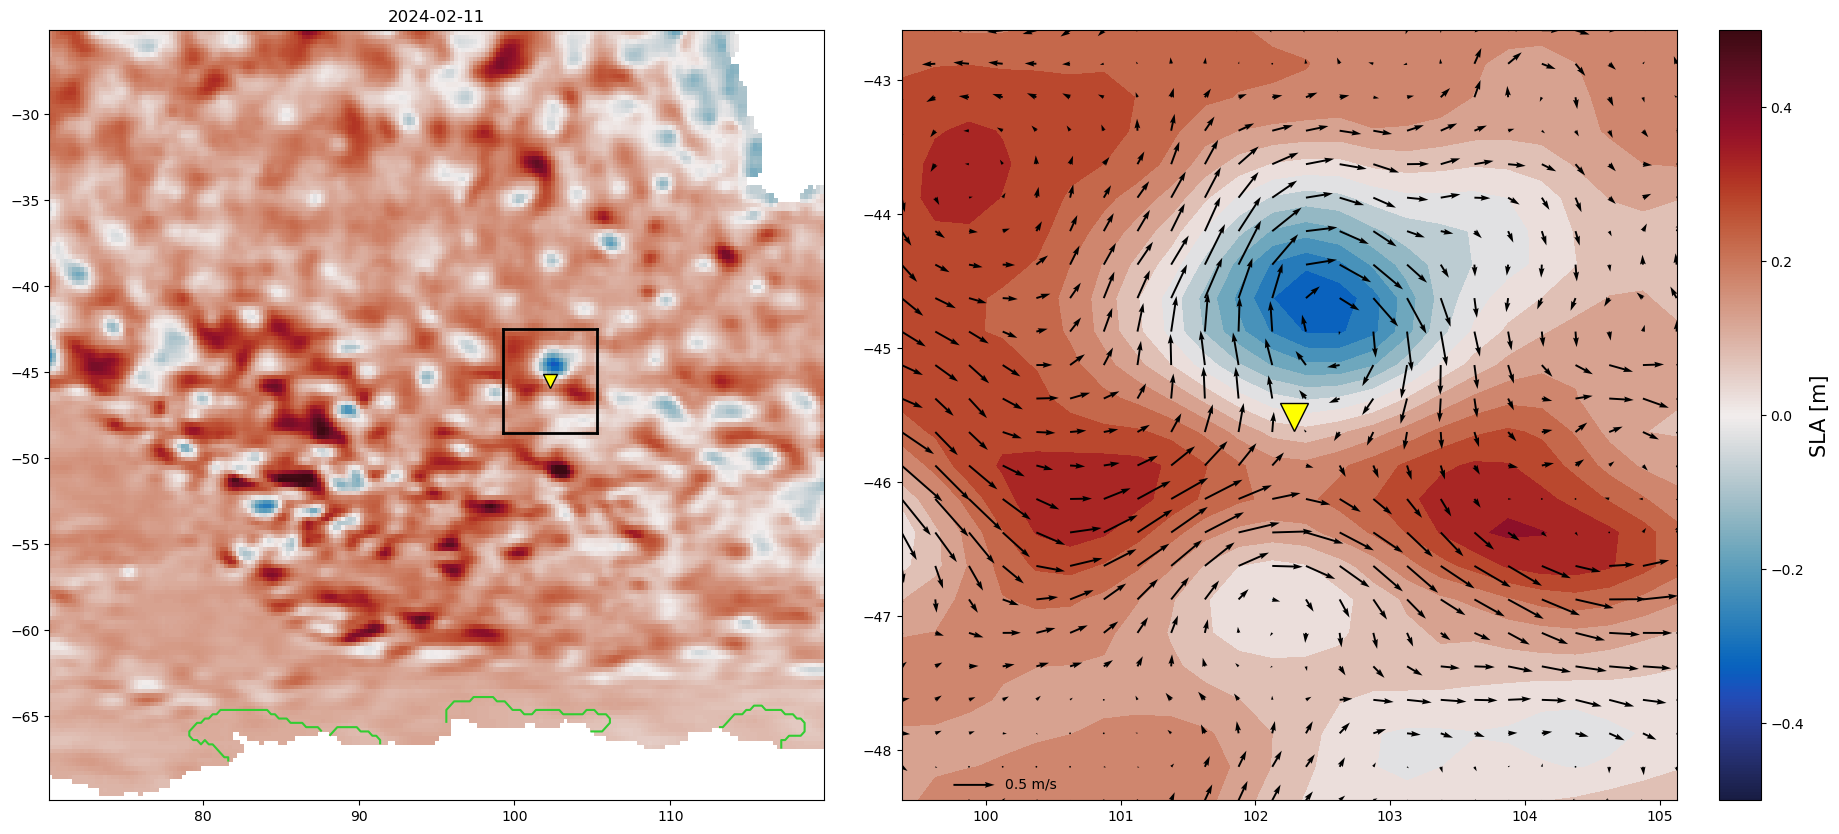

In [8]:
fig, (ax, ax1) = plt.subplots(1,2, figsize=(21,10), gridspec_kw={'width_ratios': [1, 1], 'wspace':0.1})

w=3
c = ax.pcolormesh(ds.longitude, ds.latitude,ds.sla.isel(time=0), cmap=cm.balance, vmin=-0.5, vmax=0.5)
ax.contour(ds.longitude, ds.latitude,ds.flag_ice.isel(time=0), levels=[0,1], colors=['limegreen']) # flag ice 15% ice criterion
ax.plot(lon, lat, 'v', color='yellow', markersize=10, markeredgecolor='k')
box(ax,lon-w,lon+w,lat-w,lat+w,'k')
ax.set_title(str(ds.sla.isel(time=0).time.values)[:10])

x = ds.longitude.sel(longitude = slice(lon-w,lon+w))
y = ds.latitude.sel(latitude = slice(lat-w,lat+w))
sla = ds.sla.isel(time=0).sel(longitude = slice(lon-w,lon+w), latitude = slice(lat-w,lat+w))
u = ds.ugos.isel(time=0).sel(longitude = slice(lon-w,lon+w), latitude = slice(lat-w,lat+w))
v = ds.vgos.isel(time=0).sel(longitude = slice(lon-w,lon+w), latitude = slice(lat-w,lat+w))
ax1.contourf(x, y,sla, cmap=cm.balance, levels = np.arange(-0.5,0.55,0.05), extend='both')
q=ax1.quiver(x,y,u,v)
ax1.quiverkey(q, X=0.12, Y=0.02, U=0.5,label='0.5 m/s', labelpos='E')
ax1.plot(lon, lat, 'v', color='yellow', markersize=20, markeredgecolor='k')

cax  = fig.add_axes([0.92, 0.11, 0.02, 0.77])
cbar = plt.colorbar(c,cax = cax,orientation='vertical')
cbar.set_label('SLA [m]', fontsize = 15)

plt.show()

## plottind today's data and the preceding 3 days of data

In [9]:
filename1 = "copernicus-data/copernicus_SLA_IO8S_allsat"+today_string+".nc"
filename2 = "copernicus-data/copernicus_SLA_IO8S_allsat"+str(np.datetime64(today_string)-1)+".nc"
filename3 = "copernicus-data/copernicus_SLA_IO8S_allsat"+str(np.datetime64(today_string)-2)+".nc"
filename4 = "copernicus-data/copernicus_SLA_IO8S_allsat"+str(np.datetime64(today_string)-3)+".nc"


In [10]:
ds = xr.open_mfdataset({filename1, filename2, filename3, filename4})

<ipython-input-12-697e1a40f4e1>:10: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  c = ax.pcolormesh(ds.longitude, ds.latitude,ds.sla.isel(time=i), cmap=cm.balance, vmin=-0.5, vmax=0.5)
<ipython-input-12-697e1a40f4e1>:11: UserWarning: No contour levels were found within the data range.
  ax.contour(ds.longitude, ds.latitude,ds.flag_ice.isel(time=i), levels=[0,1], colors=['limegreen']) # flag ice 15% ice criterion


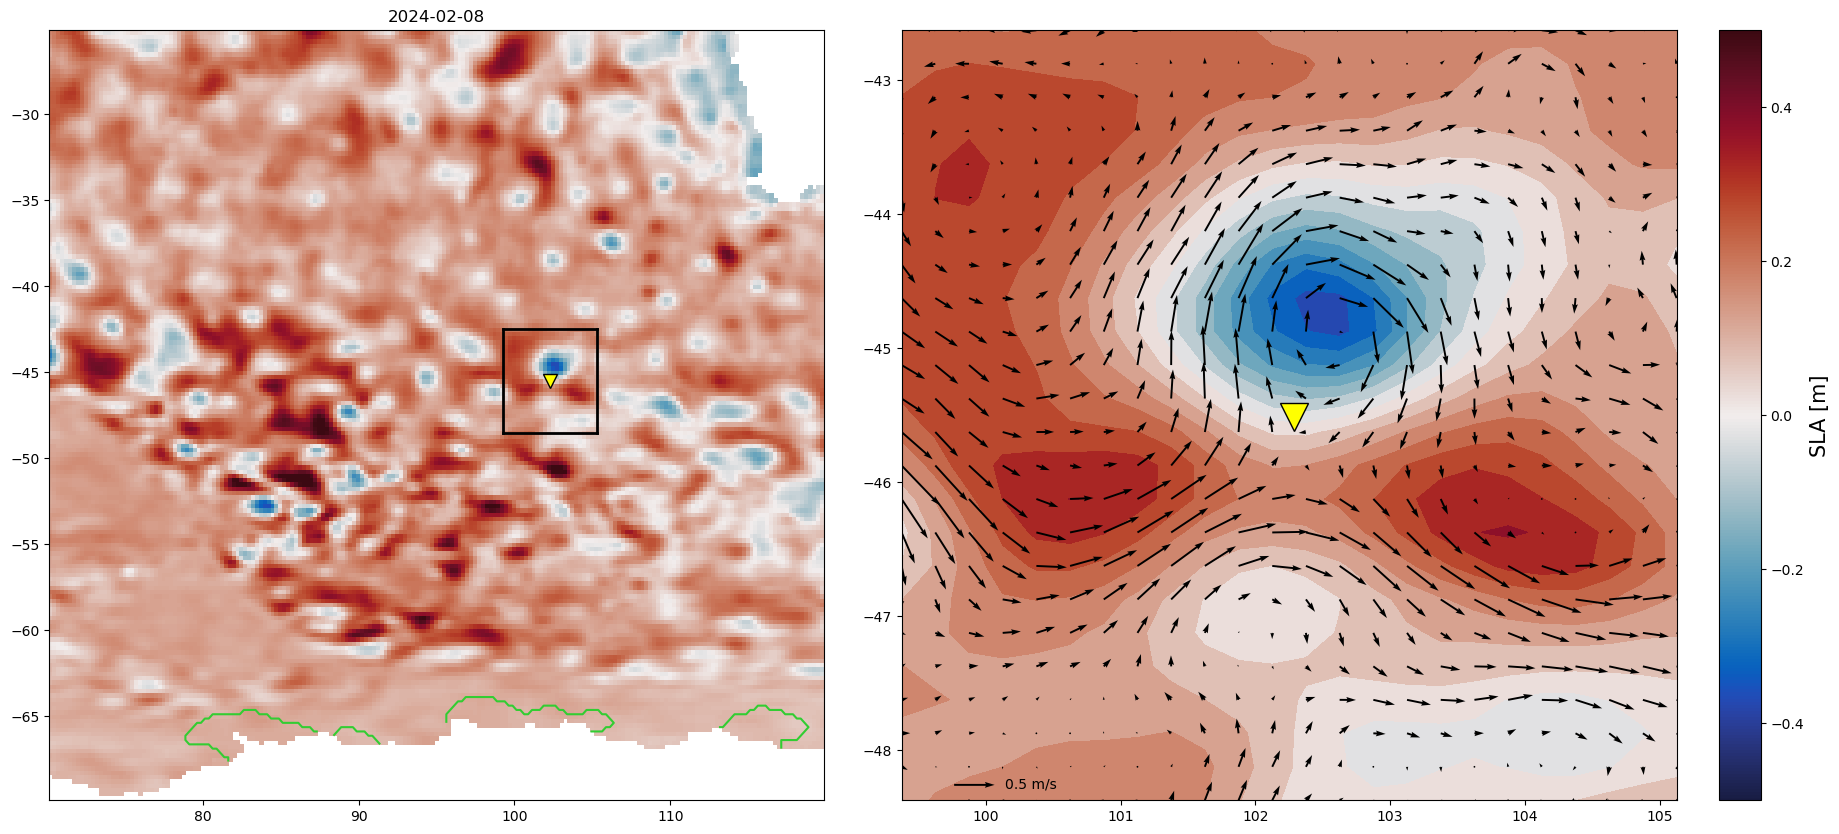

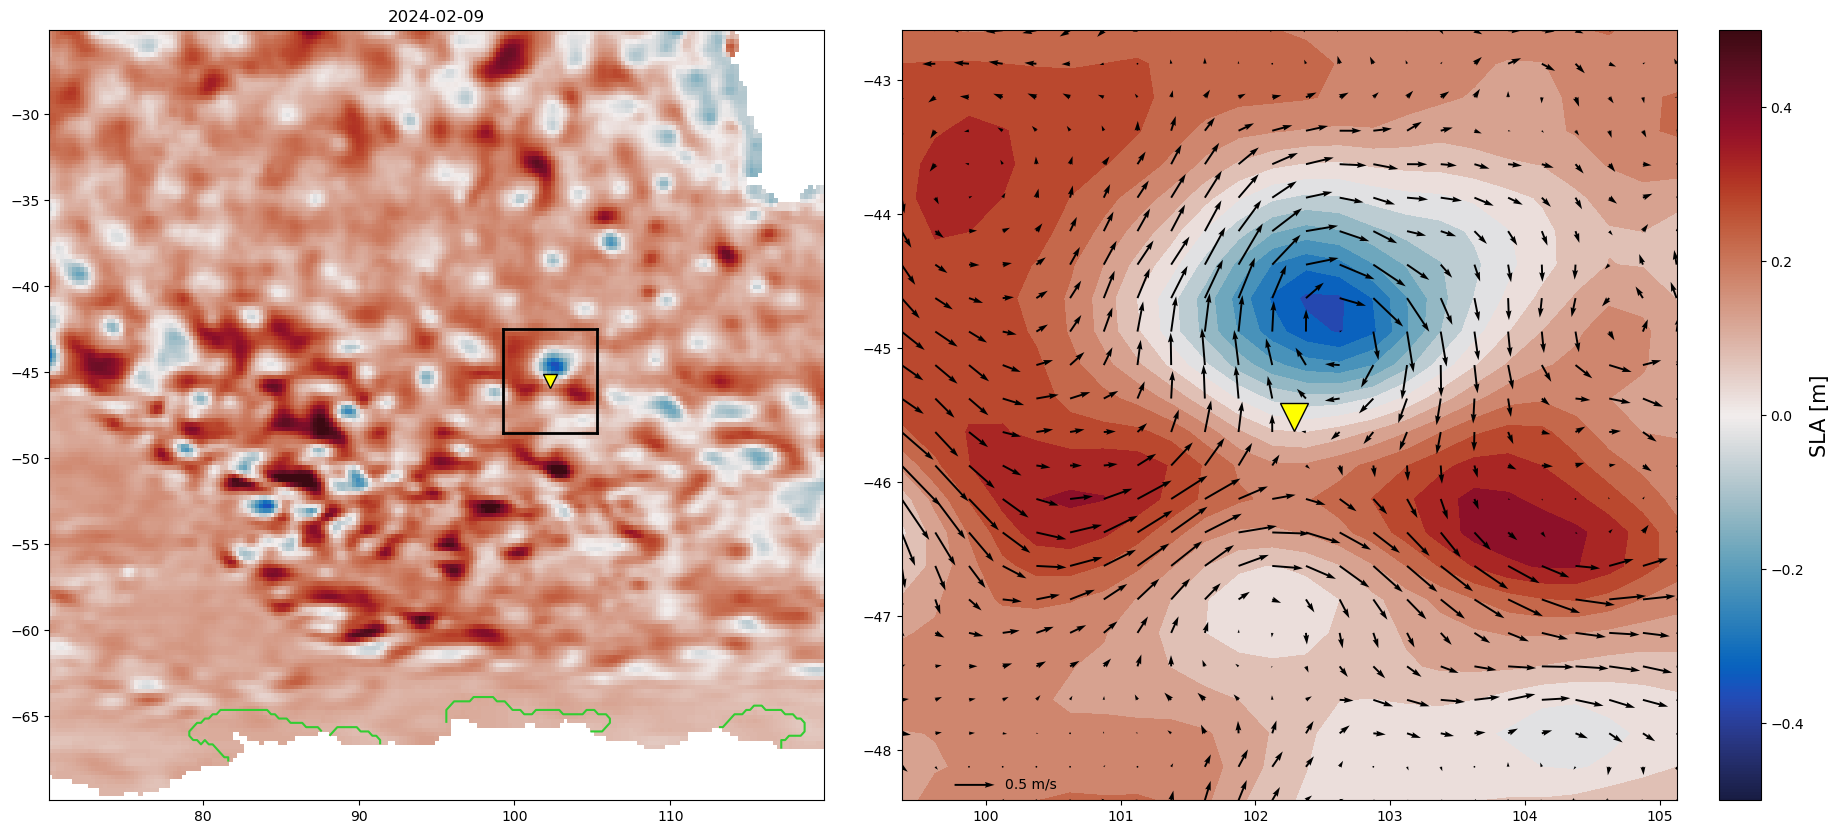

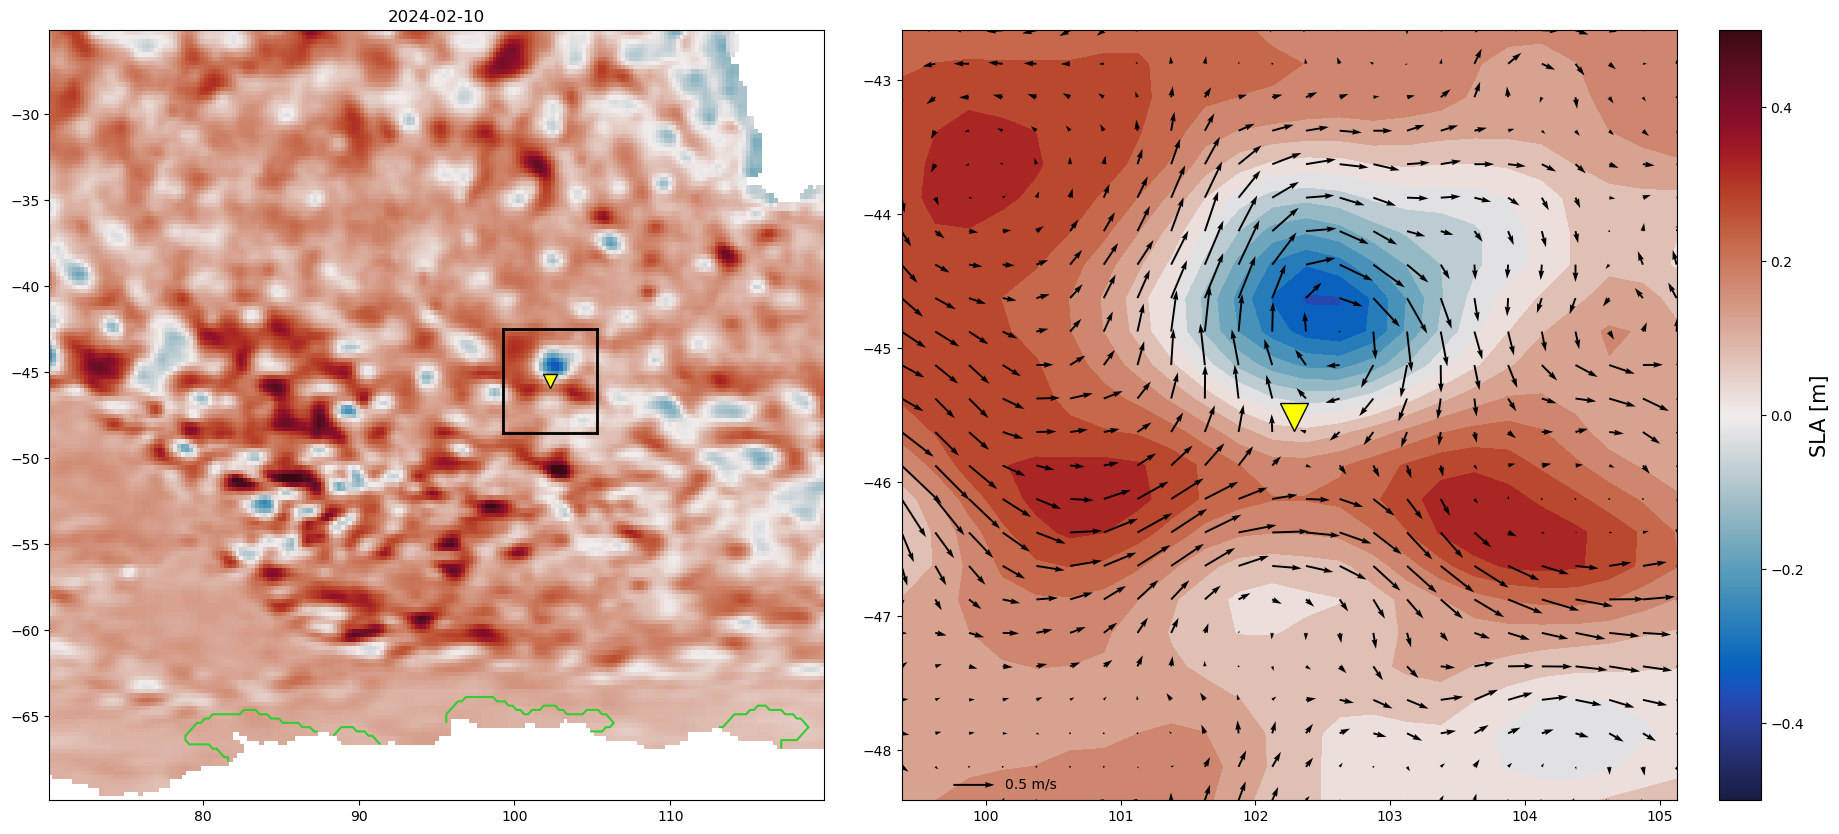

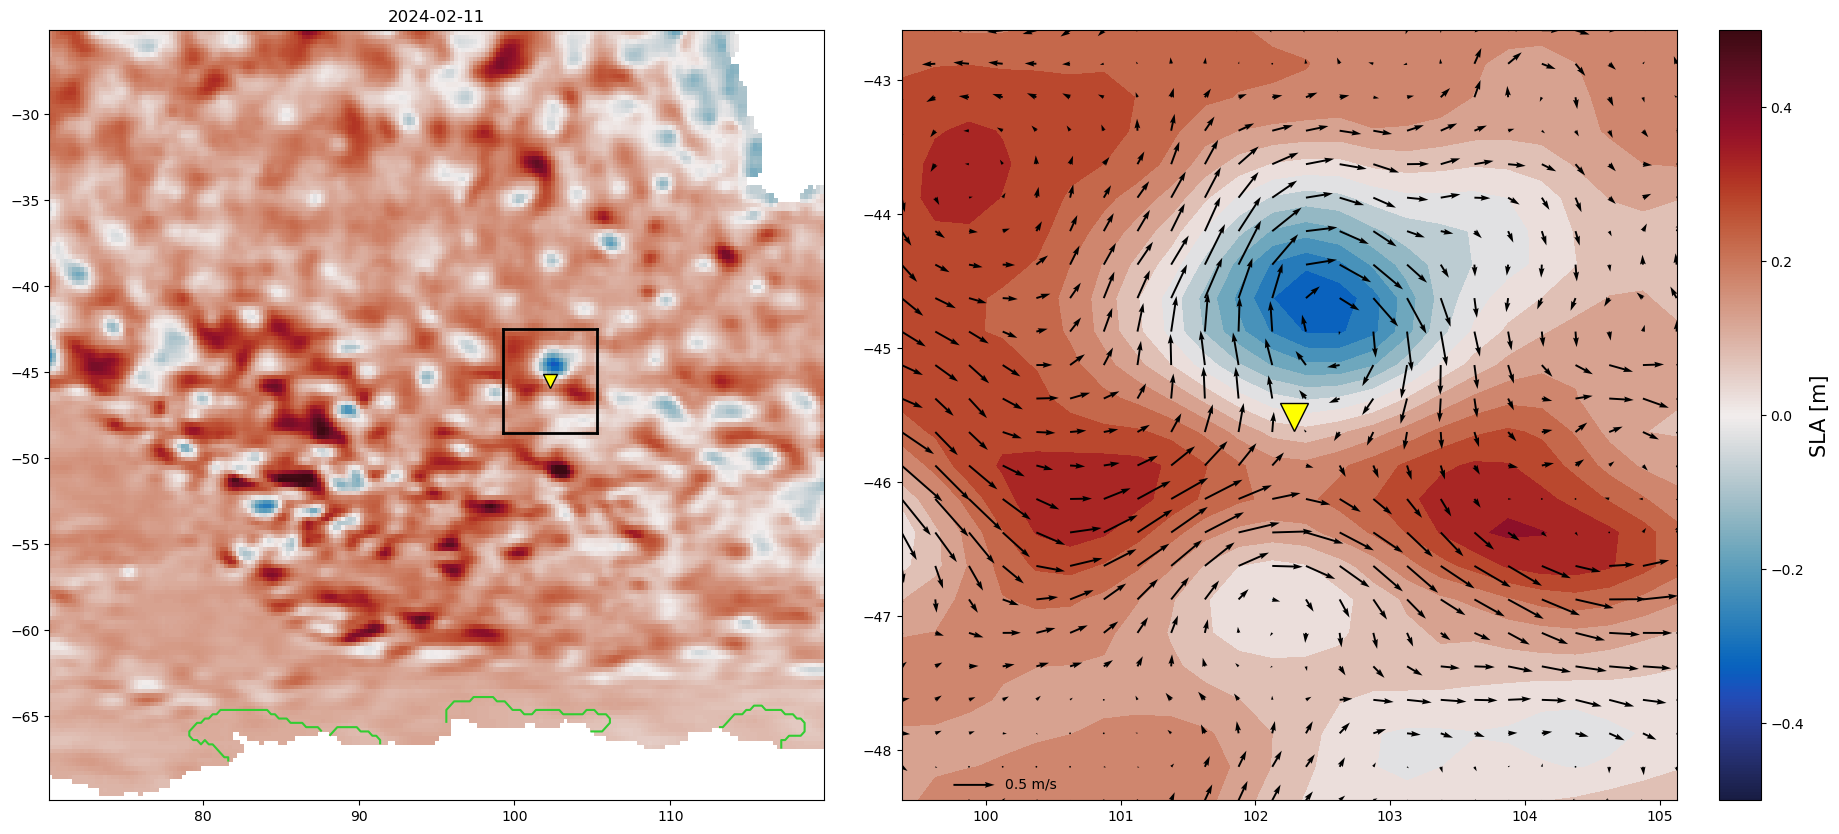

In [12]:
w=3;
## reference location (e.g. ship location)
lon=lon;
lat=lat;


for i in range(4):
    fig, (ax, ax1) = plt.subplots(1,2, figsize=(21,10), gridspec_kw={'width_ratios': [1, 1], 'wspace':0.1})
    ## full domain
    c = ax.pcolormesh(ds.longitude, ds.latitude,ds.sla.isel(time=i), cmap=cm.balance, vmin=-0.5, vmax=0.5)
    ax.contour(ds.longitude, ds.latitude,ds.flag_ice.isel(time=i), levels=[0,1], colors=['limegreen']) # flag ice 15% ice criterion
    ax.plot(lon, lat, 'v', color='yellow', markersize=10, markeredgecolor='k')
    box(ax,lon-w,lon+w,lat-w,lat+w,'k')
    ax.set_title(str(ds.sla.isel(time=i).time.values)[:10])

    ## zoomed domain
    x = ds.longitude.sel(longitude = slice(lon-w,lon+w))
    y = ds.latitude.sel(latitude = slice(lat-w,lat+w))
    sla = ds.sla.isel(time=i).sel(longitude = slice(lon-w,lon+w), latitude = slice(lat-w,lat+w))
    u = ds.ugos.isel(time=i).sel(longitude = slice(lon-w,lon+w), latitude = slice(lat-w,lat+w))
    v = ds.vgos.isel(time=i).sel(longitude = slice(lon-w,lon+w), latitude = slice(lat-w,lat+w))
    ax1.contourf(x, y,sla, cmap=cm.balance, levels = np.arange(-0.5,0.55,0.05), extend='both')
   # ax1.pcolormesh(x, y,sla, cmap=cm.balance, vmin=-0.5,vmax=0.5)
    q=ax1.quiver(x,y,u,v)
    ax1.quiverkey(q, X=0.12, Y=0.02, U=0.5,label='0.5 m/s', labelpos='E')
    ax1.plot(lon, lat, 'v', color='yellow', markersize=20, markeredgecolor='k')

    cax  = fig.add_axes([0.92, 0.11, 0.02, 0.77])
    cbar = plt.colorbar(c,cax = cax,orientation='vertical')
    cbar.set_label('SLA [m]', fontsize = 15)

plt.show()